# Explore here

In [1]:
# Your code here

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [2]:
df_depurado = df[['MedInc','Latitude','Longitude']]
df_depurado.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_depurado,test_size=0.2,random_state=42)

In [5]:
from sklearn.cluster import KMeans

model_k = KMeans(n_clusters=6,n_init='auto',random_state=42)
model_k.fit(X_train)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [6]:
model_k.labels_

array([3, 1, 1, ..., 3, 0, 5], shape=(16512,), dtype=int32)

In [7]:
y_train = list(model_k.labels_)
X_train['clusters'] = y_train
X_train.head()

,MedInc,Latitude,Longitude,clusters
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


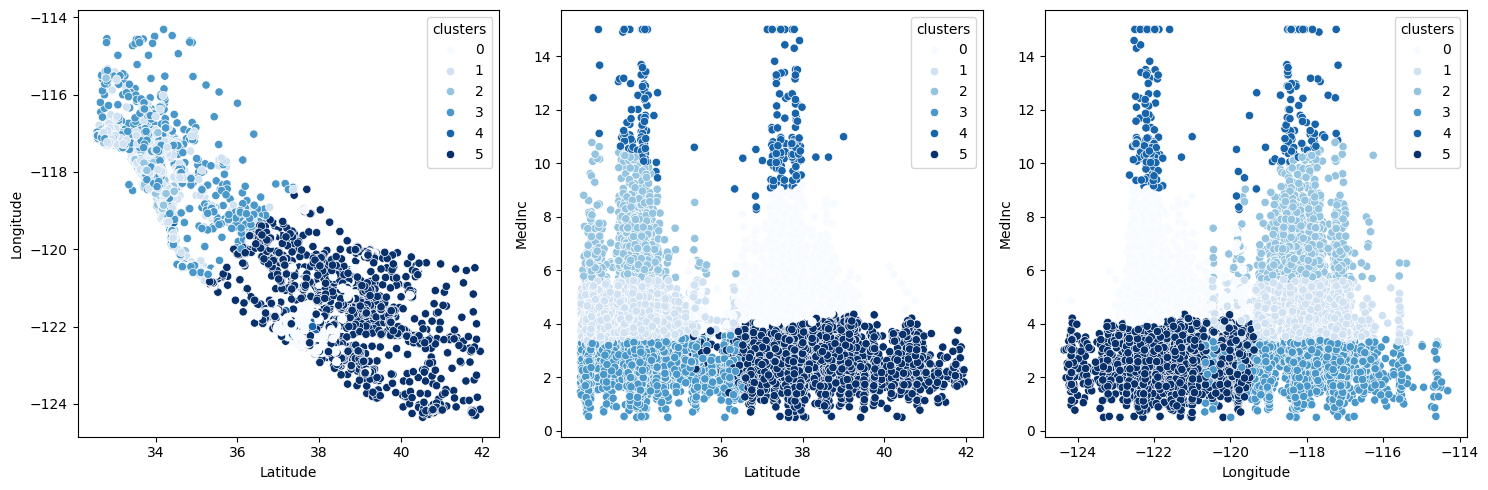

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1,3,figsize=(15,5))

sns.scatterplot(ax = axis[0], data=X_train, x='Latitude', y = 'Longitude', hue='clusters', palette='Blues')
sns.scatterplot(ax = axis[1], data=X_train, x='Latitude', y = 'MedInc', hue='clusters', palette='Blues')
sns.scatterplot(ax = axis[2], data=X_train, x='Longitude', y = 'MedInc', hue='clusters', palette='Blues')

plt.tight_layout()
plt.show()


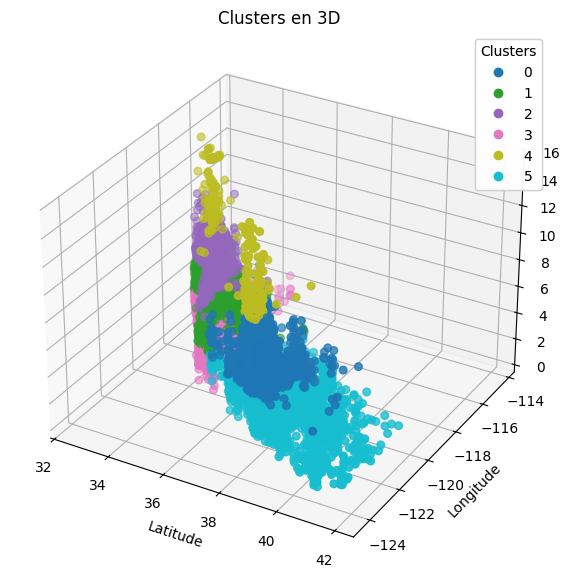

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_train['Latitude'],
    X_train['Longitude'],
    X_train['MedInc'],
    c=X_train['clusters'],
    cmap='tab10',
    s=30
)

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('MedInc')
ax.set_title('Clusters en 3D')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [16]:
y_test = list(model_k.predict(X_test))
X_test['clusters'] = y_test
X_test.head()

,MedInc,Latitude,Longitude,clusters
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


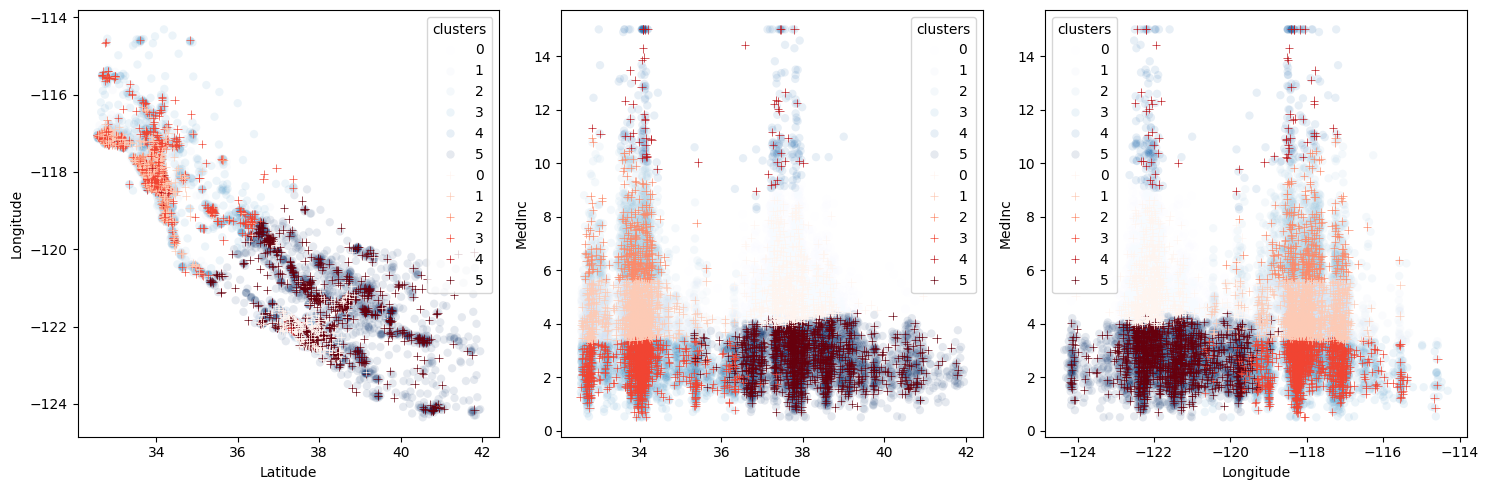

In [17]:
fig, axis = plt.subplots(1,3,figsize=(15,5))

sns.scatterplot(ax = axis[0], data=X_train, x='Latitude', y = 'Longitude', hue='clusters', palette='Blues',alpha=0.1)
sns.scatterplot(ax = axis[1], data=X_train, x='Latitude', y = 'MedInc', hue='clusters', palette='Blues',alpha=0.1)
sns.scatterplot(ax = axis[2], data=X_train, x='Longitude', y = 'MedInc', hue='clusters', palette='Blues',alpha=0.1)

sns.scatterplot(ax = axis[0], data=X_test, x='Latitude', y = 'Longitude', hue='clusters', palette='Reds', marker='+')
sns.scatterplot(ax = axis[1], data=X_test, x='Latitude', y = 'MedInc', hue='clusters', palette='Reds', marker='+')
sns.scatterplot(ax = axis[2], data=X_test, x='Longitude', y = 'MedInc', hue='clusters', palette='Reds', marker='+')  

plt.tight_layout()
plt.show()

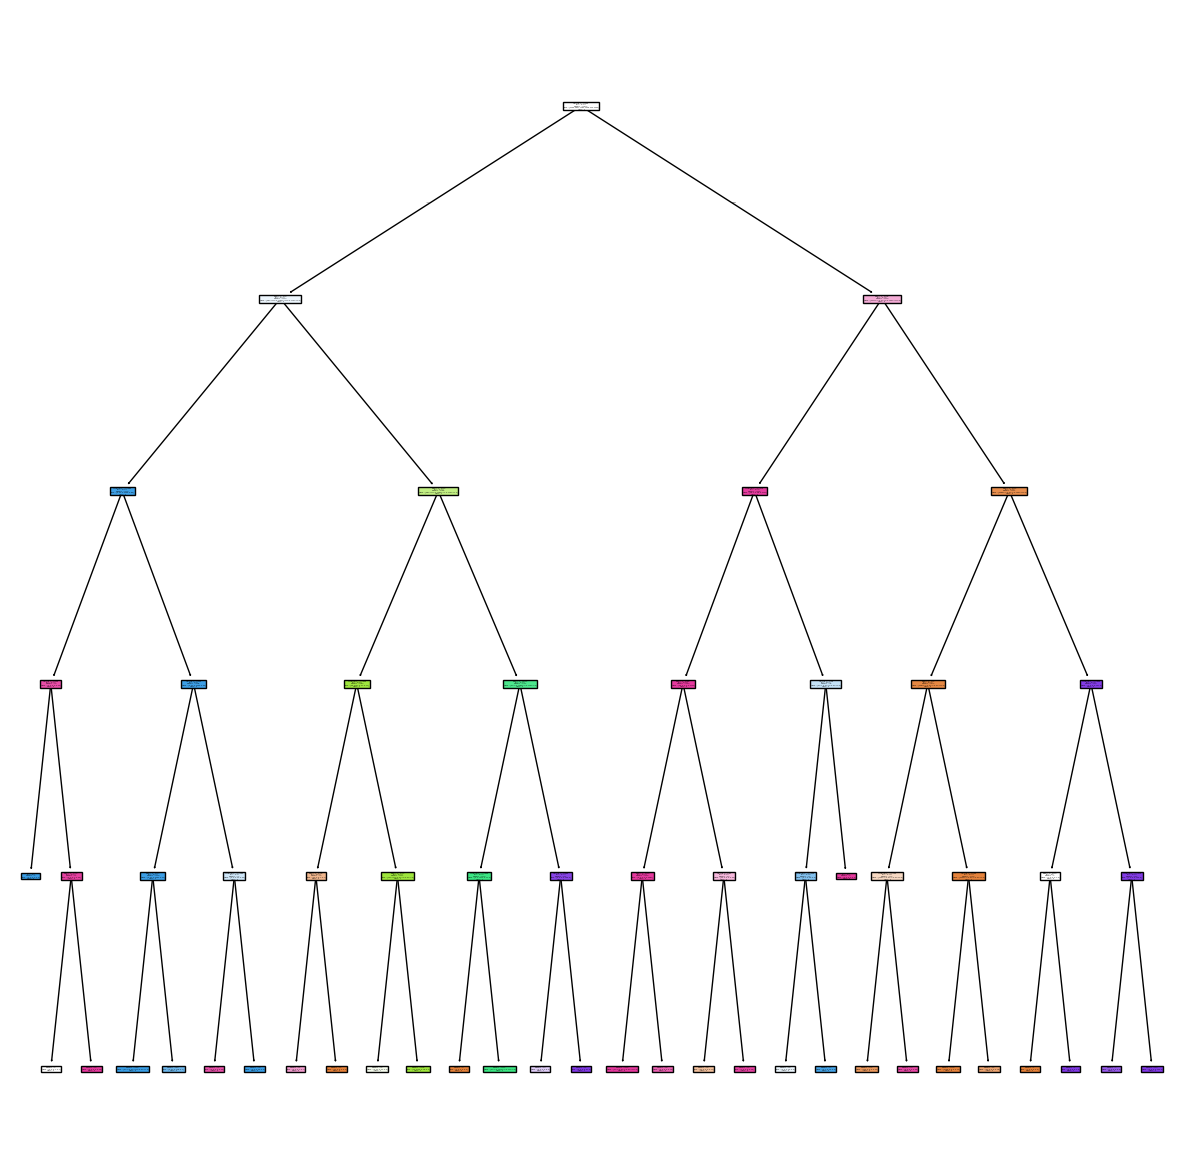

In [22]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)
tree_model.fit(X_train[['Latitude', 'Longitude', 'MedInc']], y_train)
from sklearn import tree
plt.figure(figsize=(15, 15))
tree.plot_tree(tree_model, filled=True, feature_names=['Latitude', 'Longitude', 'MedInc'], class_names=[str(i) for i in range(6)])
plt.show()

In [23]:
y_pred = tree_model.predict(X_test[['Latitude', 'Longitude', 'MedInc']])
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree model: {accuracy:.2f}')

Accuracy of the Decision Tree model: 0.98


In [24]:
from pickle import dump
dump(model_k, open('../models/kmeans_model.pkl', 'wb'))
dump(tree_model, open('../models/decision_tree_model.pkl', 'wb'))
